# E-commerce Customer Behavior - Analysis


Dataset from Kaggle:   
https://www.kaggle.com/datasets/uom190346a/e-commerce-customer-behavior-dataset?resource=download

**Overview:**  
"This dataset provides a comprehensive view of customer behavior within an e-commerce platform. Each entry in the dataset corresponds to a unique customer, offering a detailed breakdown of their interactions and transactions. The information is crafted to facilitate a nuanced analysis of customer preferences, engagement patterns, and satisfaction levels, aiding businesses in making data-driven decisions to enhance the customer experience."


**Project Outline:**
- import libraries and read csv into df
- perform exploratory data analysis (counts, nulls, categorizations, basic visuals)
- define 1 insight and create hypothesis for further analysis
- perform statistical analysis 
- provide summary and recommendations

In [31]:
# Import libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np



In [6]:
# Read data - Adding './' to signify the current directory
df = pd.read_csv("./E-commerce Customer Behavior - Sheet1.csv")  
df.head()

,Customer ID,Gender,Age,City,Membership Type,Total Spend,Items Purchased,Average Rating,Discount Applied,Days Since Last Purchase,Satisfaction Level
0,101,Female,29,New York,Gold,1120.20,14,4.6,True,25,Satisfied
1,102,Male,34,Los Angeles,Silver,780.50,11,4.1,False,18,Neutral
2,103,Female,43,Chicago,Bronze,510.75,9,3.4,True,42,Unsatisfied
3,104,Male,30,San Francisco,Gold,1480.30,19,4.7,False,12,Satisfied
4,105,Male,27,Miami,Silver,720.40,13,4.0,True,55,Unsatisfied


In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 350 entries, 0 to 349
Data columns (total 11 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Customer ID               350 non-null    int64  
 1   Gender                    350 non-null    object 
 2   Age                       350 non-null    int64  
 3   City                      350 non-null    object 
 4   Membership Type           350 non-null    object 
 5   Total Spend               350 non-null    float64
 6   Items Purchased           350 non-null    int64  
 7   Average Rating            350 non-null    float64
 8   Discount Applied          350 non-null    bool   
 9   Days Since Last Purchase  350 non-null    int64  
 10  Satisfaction Level        348 non-null    object 
dtypes: bool(1), float64(2), int64(4), object(4)
memory usage: 27.8+ KB


In [18]:
# stats summary: mean max min std percentiles
df.describe()  


,Customer ID,Age,Total Spend,Items Purchased,Average Rating,Days Since Last Purchase
count,350.000000,350.000000,350.000000,350.000000,350.000000,350.000000
mean,275.500000,33.597143,845.381714,12.600000,4.019143,26.588571
std,101.180532,4.870882,362.058695,4.155984,0.580539,13.440813
min,101.000000,26.000000,410.800000,7.000000,3.000000,9.000000
25%,188.250000,30.000000,502.000000,9.000000,3.500000,15.000000
50%,275.500000,32.500000,775.200000,12.000000,4.100000,23.000000
75%,362.750000,37.000000,1160.600000,15.000000,4.500000,38.000000
max,450.000000,43.000000,1520.100000,21.000000,4.900000,63.000000


In [20]:
# list the columns with null counts
df.isnull().sum()

Customer ID                 0
Gender                      0
Age                         0
City                        0
Membership Type             0
Total Spend                 0
Items Purchased             0
Average Rating              0
Discount Applied            0
Days Since Last Purchase    0
Satisfaction Level          2
dtype: int64

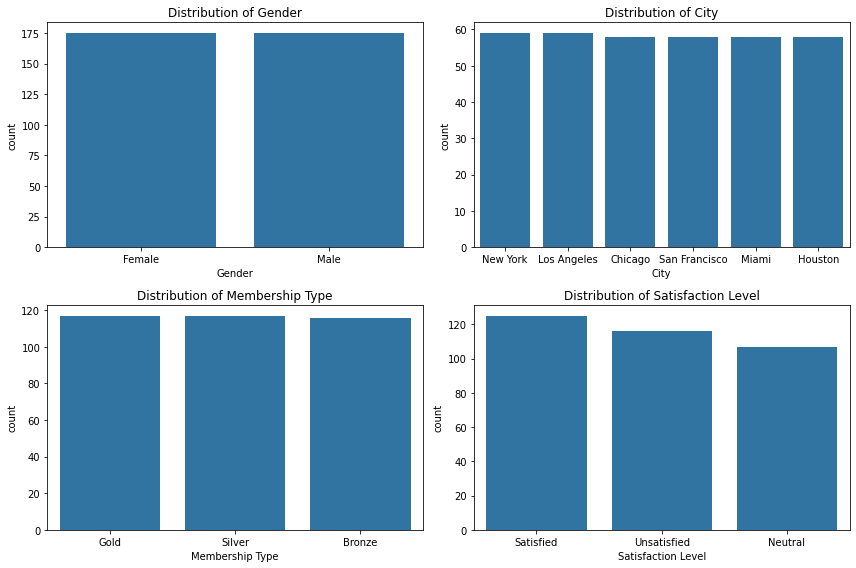

In [55]:
# plot visuals for distribution of categorical variables

categorical_columns = ['Gender', 'City', 'Membership Type', 'Satisfaction Level']

# Set the size of the plots
plt.figure(figsize=(12, 8))

# Loop through each categorical column and create a bar plot
for i, col in enumerate(categorical_columns, 1):
    plt.subplot(2, 2, i)  # 2x2 grid for 4 plots
    sns.countplot(x=col, data=df, order=df[col].value_counts().index)  # Horizontal bar plot
    plt.title(f'Distribution of {col}')
    plt.tight_layout()  # Adjust subplot to fit in the figure area

plt.show()


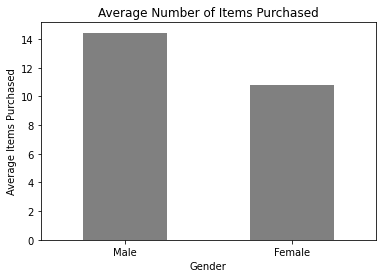

Gender
Male      14.44
Female    10.76
Name: Items Purchased, dtype: float64
12.6


In [79]:
# get average number of items purchased based on Gender

avg_items_gender = df.groupby(["Gender"])["Items Purchased"].mean().sort_values(ascending=False)
avg_items_df = df["Items Purchased"].mean()

avg_items_gender.plot(kind='bar', color='grey')

plt.title('Average Number of Items Purchased')
plt.ylabel('Average Items Purchased')
plt.xticks(rotation=0)  
plt.show()
print(avg_items_gender)
print(avg_items_df)

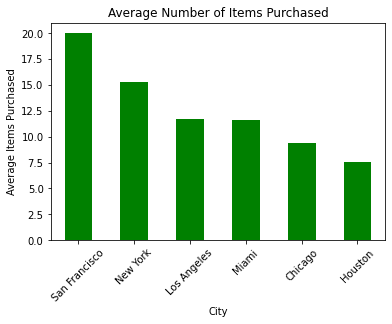

City
San Francisco    20.000000
New York         15.271186
Los Angeles      11.677966
Miami            11.637931
Chicago           9.413793
Houston           7.568966
Name: Items Purchased, dtype: float64


In [80]:
# get average number of items purchased based on City
avg_items_city = df.groupby(["City"])["Items Purchased"].mean().sort_values(ascending=False)


avg_items_city.plot(kind='bar', color='green')

plt.title('Average Number of Items Purchased')
plt.ylabel('Average Items Purchased')
plt.xticks(rotation=45)  
plt.show()
print(avg_items_city)

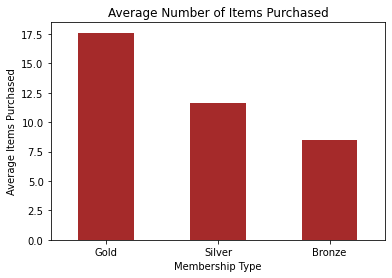

Membership Type
Gold      17.615385
Silver    11.658120
Bronze     8.491379
Name: Items Purchased, dtype: float64


In [81]:
# get average number of items purchased based on Membership Type
avg_items_membership = df.groupby(["Membership Type"])["Items Purchased"].mean().sort_values(ascending=False)

avg_items_membership.plot(kind='bar', color='brown')

plt.title('Average Number of Items Purchased')
plt.ylabel('Average Items Purchased')
plt.xticks(rotation=0)  
plt.show()
print(avg_items_membership)



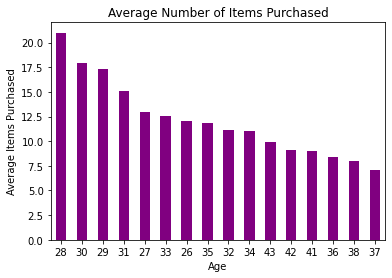

Age
28    21.000000
30    17.895833
29    17.272727
31    15.080000
27    12.920000
33    12.600000
26    12.000000
35    11.800000
32    11.121212
34    11.000000
43     9.880000
42     9.111111
41     9.041667
36     8.400000
38     8.000000
37     7.041667
Name: Items Purchased, dtype: float64


In [86]:
# get average number of items purchased based on Age group
avg_items_age = df.groupby(["Age"])["Items Purchased"].mean().sort_values(ascending=False)

avg_items_age.plot(kind='bar', color='purple')

plt.title('Average Number of Items Purchased')
plt.ylabel('Average Items Purchased')
plt.xticks(rotation=0)  
plt.show()
print(avg_items_age)

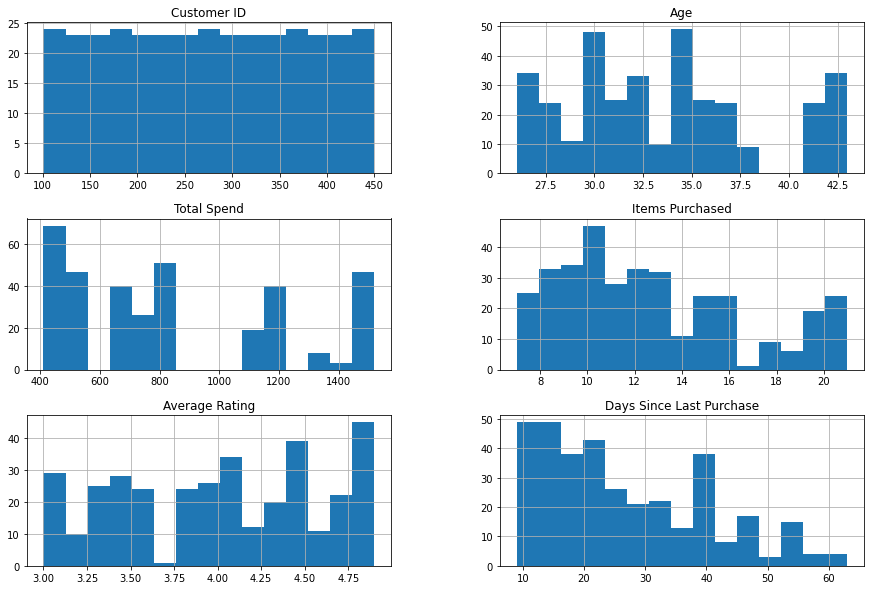

In [87]:
# Distribution of Numerical Variables:

df.hist(bins=15, figsize=(15, 10))
plt.show()


In [89]:
# Grouby aggregate analysis by any categorical variable, example Membership Type

df.groupby('Membership Type').agg({
    'Total Spend': 'mean',
    'Items Purchased': 'mean',
    'Average Rating': 'mean'
})


,Total Spend,Items Purchased,Average Rating
Membership Type,,,
Bronze,473.388793,8.491379,3.325000
Gold,1311.144444,17.615385,4.675214
Silver,748.432479,11.658120,4.051282


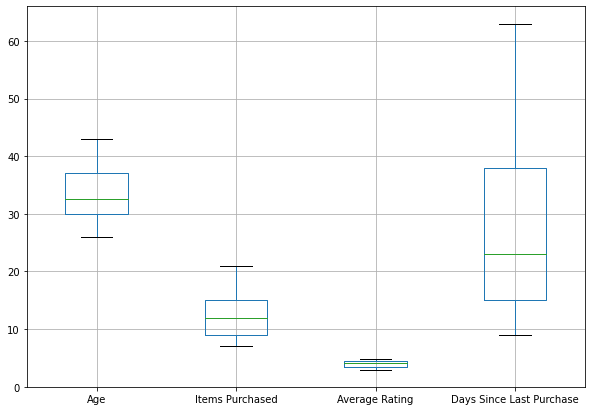

In [96]:
# Outlier Detection - Boxplots for Numerical Variables

df[['Age', 'Items Purchased', 'Average Rating', 'Days Since Last Purchase']].boxplot(figsize=(10, 7))
plt.show()


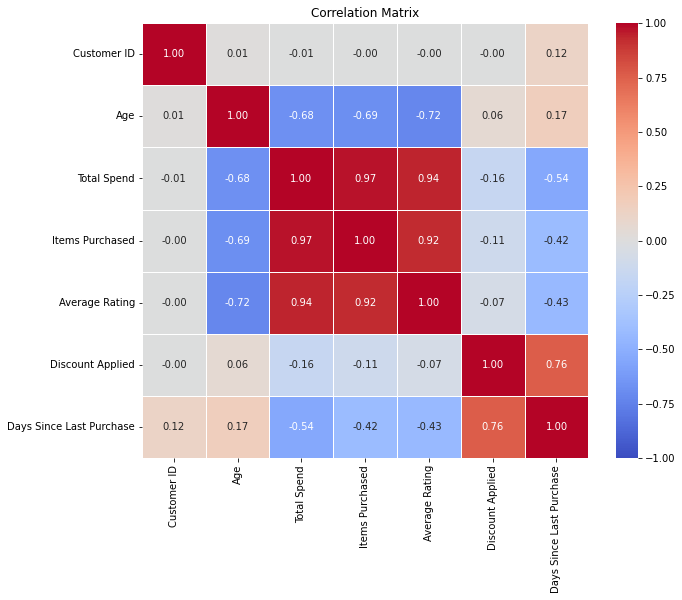

In [108]:
# Correlation analysis matrix

correlation_matrix = df.corr()

plt.figure(figsize=(10, 8))  # Set the size of the heatmap

# Create the heatmap
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0, vmin=-1, vmax=1, fmt='.2f', linewidths=0.5)

plt.title('Correlation Matrix')
plt.show()



# EDA RESULTS & NEXT STEPS

**EDA results:**

- Dataset size 350 rows
- Average count of items purchased = 12.6
- Males purchased more items than Females on average
- SF and NYC are the 2 cities that have an average count of items puchased than average of 12.6
- Gold membership has the most purchases
- Ages with most purchases: 28 - 31
- Strong negative correlation between Age and Total Spend, Items Purchased, Average Rating

**Insight that stands out:**
- As age increases, sales and ratings decrease.
- Given we don't know what kind of products this dataset is about, we only know this is an e-commerce/digital behavior dataset, one assumption could be that this company wants to improve customer experience and sales in the 'older' market.

**Next steps:**
- Look at the age distribution per city. Example: Maybe NY has a younger population than Houston.
- Plot a distribution of average age per City
- Plot a distribution of average age per Memberhsip type (even though we don't know perks or cost of membership)



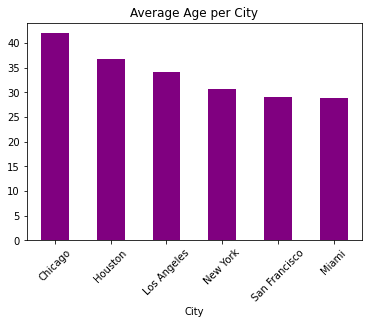

City
Chicago          42.017241
Houston          36.706897
Los Angeles      34.118644
New York         30.711864
San Francisco    29.120690
Miami            28.948276
Name: Age, dtype: float64


In [121]:
# Plot a distribution of average age per City

avg_age_city = df.groupby(["City"])["Age"].mean().sort_values(ascending=False)

avg_age_city.plot(kind='bar', color='purple')

plt.title('Average Age per City')
plt.xticks(rotation=45)  
plt.show()
print(avg_age_city)

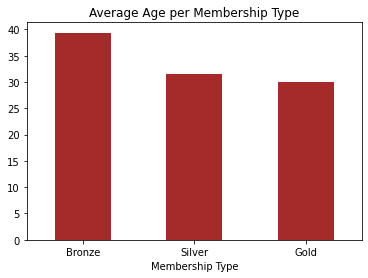

Membership Type
Bronze    39.362069
Silver    31.555556
Gold      29.923077
Name: Age, dtype: float64

In [120]:
'''
Plot a distribution of average age per Memberhsip type.
Even though we don't know perks or cost of membership, 
But assume that Gold has the best perks like free shipping, more discounts, loyalty points, etc)

'''

avg_age_membership = df.groupby(["Membership Type"])["Age"].mean().sort_values(ascending=False)

avg_age_membership.plot(kind='bar', color='brown')

plt.title('Average Age per Membership Type')
plt.xticks(rotation=0)  
plt.show()
print(avg_age_membership)
